## Counting and enumerating analogs from a known route

### 1. Counting

This Notebook will walk through how to count the estimated number of analogs enabled by the synthetic route defined in the file `data/mitapivat_experimental_route.txt`
(Note that the python scripts may take a while to run, as the initialization can be slow)

We will start with the estimation of acccessible analogs

To do this, run the command: 
`python count_analogs.py --path data/mitapivat_experimental_route.txt --out outputs/test --leaf-out outputs/test_leaf_info.json --building-blocks easie/building_blocks/buyables.json.gz --sim-thresh 0.6 --mw-cutoff 500 --brenk-filters`

This will count the number of analogs that are accessible for the experimental mitapivat route with a Tanimoto similarity threshold on the building blocks of 0.6, and a molecular weight cutoff on the products of 500g/mol. Brenk filters are applied to remove building blocks that would lead to moieties in the products that are not typically found in pharmaceuticals.

The number of estimated analogs will be output to `outputs/test_enumeration_counting_summary.json`
Additionally, information about the building block analog matches will be written to `outputs/test_leaf_info.json`

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

with open('outputs/test_enumeration_counting_summary.json', 'r') as f:
    counting_results = json.load(f)
print(counting_results)

{'Number of analogs:': 44, 'Similarity threshold:': 0.6, 'MW cutoff:': 500}


In [15]:
with open('outputs/test_leaf_info.json', 'r') as f:
    leaf_info = json.load(f)

The leaf information is a list of dictionaries. Each dictionary corresponds to one of the original building blocks. Each dictionary contains the SMILES for the original building block (`smiles`), the SMARTS query pattern used to find building block analogs (`query`), and the matched analogs for the building block (`options`)

In [16]:

print ('Number of analogs for each building block:')
for l in leaf_info:
    print ('id={}: {} analogs'.format(l['id'], len(l['options'])))
    

Number of analogs for each building block:
id=2: 1 analogs
id=3: 12 analogs
id=8: 10 analogs


NOTE: the discrepancy between the product of the building block analogs and the reported number of analogs above is due to the MW filter on products

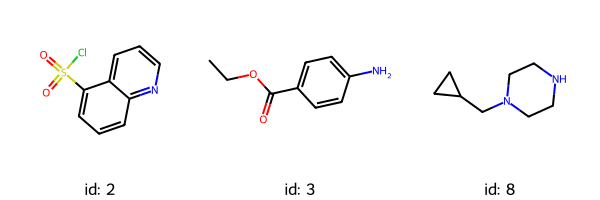

In [17]:
original_building_blocks = [l['smiles'] for l in leaf_info]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in original_building_blocks], legends=['id: '+str(l['id']) for l in leaf_info])

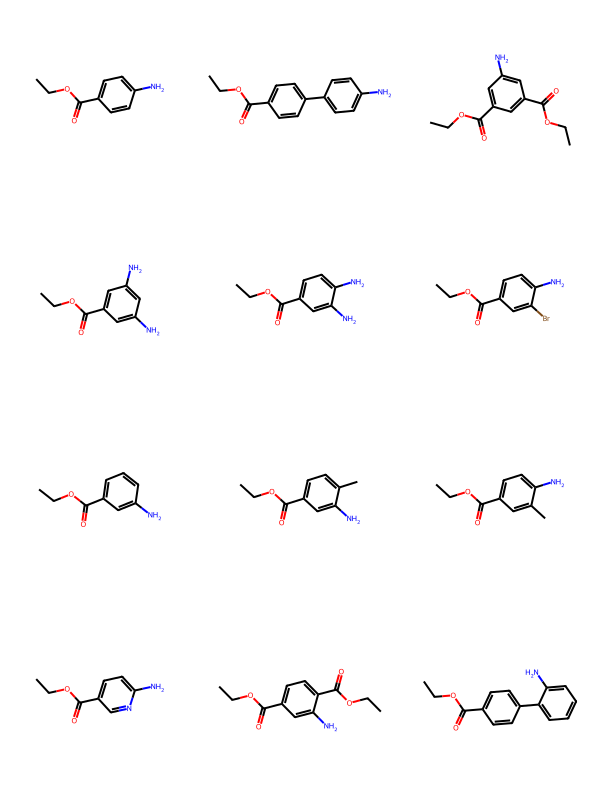

In [18]:
#Visualize the first 50 analogs to the aniline building block (3)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in leaf_info[1]['options'][:50]])

### 2. Enumeration
The following command performs the explicit enumeration of analogs from the same route:
`python enumerate_analogs.py --path data/mitapivat_experimental_route.txt --building-blocks easie/building_blocks/buyables.json.gz --out outputs/test --sim-thresh 0.6 --brenk-filters`

Once again,a similarity threshold of 0.6 is set for the building blocks and Brenk filters are applied to remove building blocks that would lead to moieties in the products that are not typically found in pharmaceuticals.

The enumerated compounds are written to `outputs/test_enumerated_analogs.txt`

In [19]:
with open('outputs/test_enumerated_analogs.txt', 'r') as f:
    results = json.load(f)

The results are a returned as a list of dictionaries. Each dictionary contains the SMILES for the product (`smiles`) as well as the SMILES for each of the associated building blocks

In [20]:
result_smiles = [entry['smiles'] for entry in results]
result_mols = [Chem.MolFromSmiles(s) for s in result_smiles]

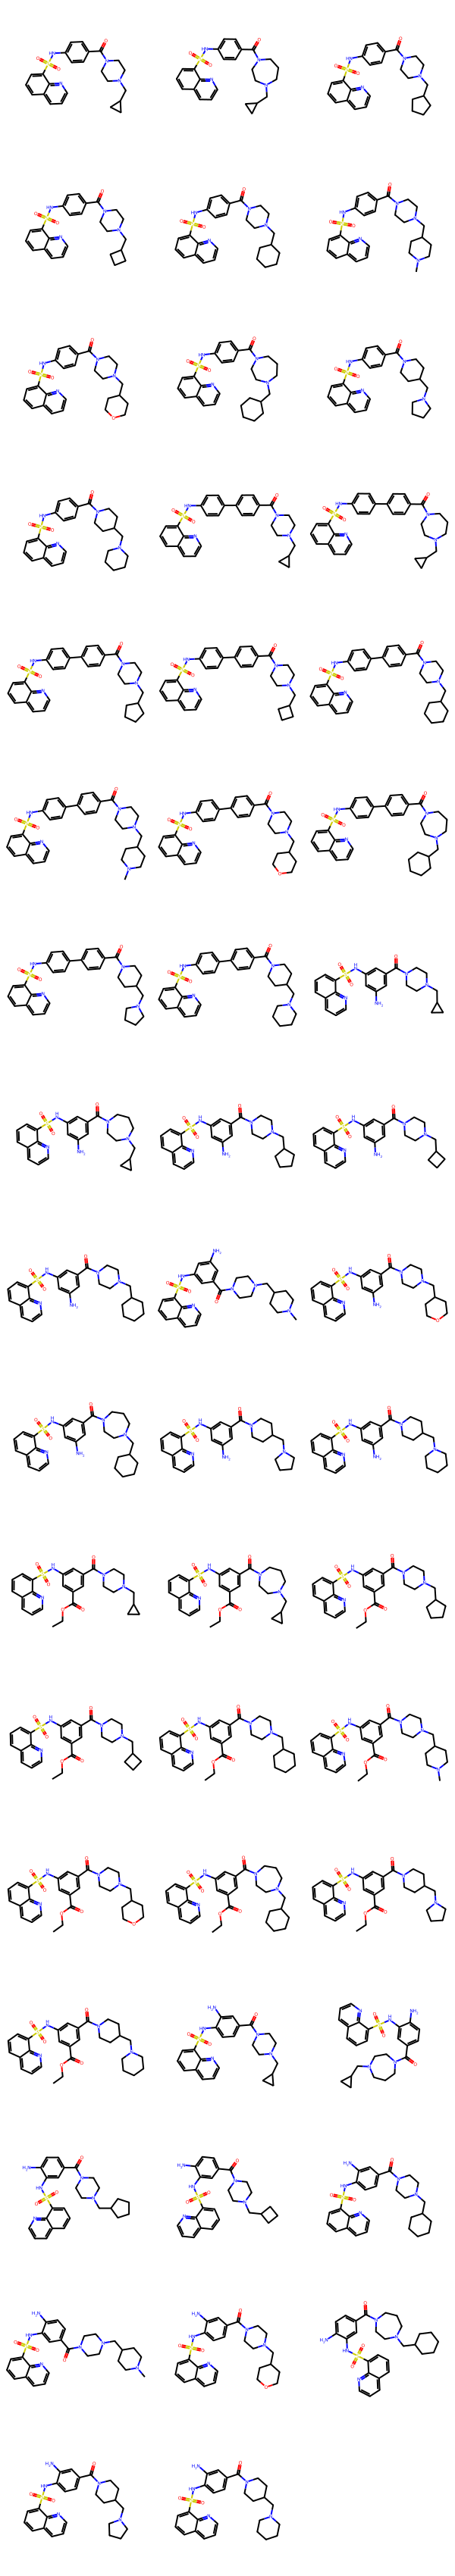

In [21]:
#Visualize the first 50 products
Chem.Draw.MolsToGridImage(result_mols[:50])

In [22]:
molecular_weights = [Descriptors.ExactMolWt(m) for m in result_mols]

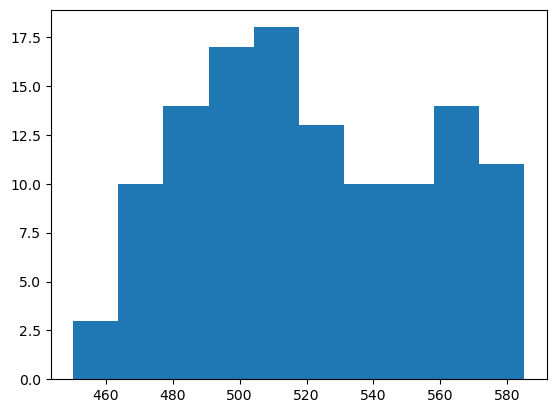

In [23]:
plt.hist(molecular_weights)
plt.show()

We can confirm that the number of explicitly enumerated product molecules with a molecular weight ≤ 500 g/mol is equal to the nubmer that was estimated

In [26]:
print ("Number of enumerated compounds with a molecular weight ≤ 500:")
print (len([mw for mw in molecular_weights if mw <=500]))

Number of enumerated compounds with a molecular weight ≤ 500:
44
